In [1]:
# Load in phased regions.
import pandas as pd
import numpy as np

PHASINGS_DIR='/home/groups/dpwall/briannac/alt_haplotypes/data/phasings'
FINAL_PHASINGS_DIR='/home/groups/dpwall/briannac/alt_haplotypes/data/phasings'

# Find all family regions.

### Note: For some reason, family_regions.df and starts_stops_chrom.df save funny
### if run in script, but work ok if run in python notebook...
print('building family regions dataframe...')
start_ends = pd.read_table(PHASINGS_DIR + '/regions.tsv', header=None)

start_ends.columns = ['chrom', 'start_pos', 'end_pos']
start_ends['chrom']  = [c.replace('chr', '') for c in start_ends['chrom']]
#start_ends['chrom']  = [c.replace('X', 'XX') for c in start_ends['chrom']]
#start_ends['chrom']  = ['0' + c if len(c)==1 else c for c in start_ends['chrom']]
start_ends['start_pos']  = [int(c) for c in start_ends['start_pos']]
start_ends['end_pos']  = [int(c) for c in start_ends['end_pos']]
start_ends.sort_values(['chrom', 'start_pos', 'end_pos'], inplace=True)
start_ends.index = ['%s.%09d.%09d' % (i,int(j),int(k)) for i,j,k in zip(start_ends.chrom, start_ends.start_pos, start_ends.end_pos)]
start_ends.to_pickle(FINAL_PHASINGS_DIR + '/family_regions.df')

# Find all start/ends for global regions.
print("Building grouped dataframe...")
grouped = start_ends.groupby('chrom').aggregate(lambda x: sorted(list(set(x))))
grouped['positions'] = [sorted(list(set(g[1].start_pos).union(set(g[1].end_pos)))) for g in grouped.iterrows()]
grouped['starts'] = [g[1].positions[:-1] for g in grouped.iterrows()]
grouped['ends'] = [g[1].positions[1:] for g in grouped.iterrows()]
grouped.drop(['start_pos', 'end_pos', 'positions'], axis=1, inplace=True)
grouped.to_pickle(FINAL_PHASINGS_DIR + '/starts_stops_chrom.df')

# Create dictionary of family region / index.
print('building dictionary of family regions/idx...')
fam_region_to_idx = {i:j for i,j in zip(start_ends.index, list(range(len(start_ends))))}
idx_to_fam_region = {j:i for i,j in zip(start_ends.index, list(range(len(start_ends))))}
np.save(FINAL_PHASINGS_DIR + '/fam_region_to_idx.npy', fam_region_to_idx)
np.save(FINAL_PHASINGS_DIR + '/idx_to_fam_region.npy', idx_to_fam_region)

# Create dictionary of global region / index
print('building dictionary of global regions/idx...')
global_regions = ['%s.%09d.%09d' % (i[0], i[1].starts[s], i[1].ends[s]) for i in grouped.iterrows() for s in range(len(i[1].starts))]
idx_to_global_region = {i:region for i,region in enumerate(global_regions)}
global_region_to_idx = {region:i for i,region in enumerate(global_regions)}
np.save(FINAL_PHASINGS_DIR + '/idx_to_global_region.npy', idx_to_global_region)
np.save(FINAL_PHASINGS_DIR + '/global_region_to_idx.npy', global_region_to_idx)


building family regions dataframe...
Building grouped dataframe...
building dictionary of family regions/idx...
building dictionary of global regions/idx...


In [64]:
# Create dictionary of family region / index.
print('building dictionary of family regions/idx...')
fam_region_to_idx = {i:j for i,j in zip(start_ends.index, list(range(len(start_ends))))}
idx_to_fam_region = {j:i for i,j in zip(start_ends.index, list(range(len(start_ends))))}
np.save(FINAL_PHASINGS_DIR + '/fam_region_to_idx.npy', fam_region_to_idx)
np.save(FINAL_PHASINGS_DIR + '/idx_to_fam_region.npy', idx_to_fam_region)

# Create dictionary of global region / index
print('building dictionary of global regions/idx...')
global_regions = ['%s.%09d.%09d' % (i[0], i[1].starts[s], i[1].ends[s]) for i in grouped.iterrows() for s in range(len(i[1].starts))]
idx_to_global_region = {i:region for i,region in enumerate(global_regions)}
global_region_to_idx = {region:i for i,region in enumerate(global_regions)}
np.save(FINAL_PHASINGS_DIR + '/idx_to_global_region.npy', idx_to_global_region)
np.save(FINAL_PHASINGS_DIR + '/global_region_to_idx.npy', global_region_to_idx)

set()

In [52]:
from collections import Counter
Counter(start_ends[start_ends['chrom']=='01'].end_pos.values).most_common()

[(248956422, 682),
 (105892900, 23),
 (89010160, 17),
 (57439293, 15),
 (67471356, 15),
 (89012910, 15),
 (57439629, 14),
 (84547719, 13),
 (209970663, 12),
 (179351022, 11),
 (235798578, 11),
 (19166715, 10),
 (152788152, 10),
 (161655284, 10),
 (208897429, 10),
 (240459725, 10),
 (1584321, 9),
 (13170193, 9),
 (63044501, 9),
 (111120385, 9),
 (84548752, 9),
 (111120102, 9),
 (146317227, 9),
 (122550423, 8),
 (196820071, 8),
 (227495449, 8),
 (245465002, 8),
 (771398, 7),
 (17152167, 7),
 (58614985, 7),
 (18502788, 7),
 (161654771, 7),
 (152213025, 7),
 (150482491, 7),
 (184639800, 7),
 (184640213, 7),
 (633099, 6),
 (11801925, 6),
 (19166383, 6),
 (16947634, 6),
 (67470602, 6),
 (63044868, 6),
 (217231028, 6),
 (160500468, 6),
 (146320718, 6),
 (105892488, 6),
 (196818615, 6),
 (124820323, 6),
 (124793461, 6),
 (149378323, 6),
 (149365556, 6),
 (196820947, 6),
 (209969634, 6),
 (208891915, 6),
 (236428493, 6),
 (208897437, 6),
 (236523845, 6),
 (245464951, 6),
 (529815, 5),
 (713812,

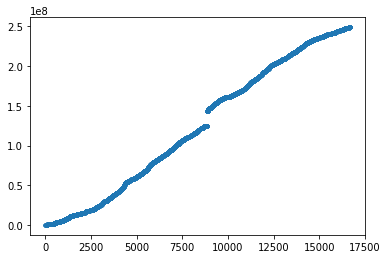

In [41]:
import matplotlib.pyplot as plt
plt.plot(grouped.iloc[0].starts, '.')
plt.show()

In [31]:
len(set(start_ends[start_ends.chrom=='01'].start_pos).union(set(start_ends[start_ends.chrom=='01'].end_pos)))

16682

In [34]:
len(set(start_ends[start_ends.chrom=='01'].start_pos))

15688

In [36]:
len(set(start_ends[start_ends.chrom=='01'].end_pos))

15621

In [33]:
sum(start_ends['chrom']=='01')

18492

In [22]:
sum([len(s) for s in grouped.starts])

225313

In [1]:
# Create dictionary of family region / index.
print('building dictionary of family regions/idx...')
fam_region_to_idx = {i:j for i,j in zip(start_ends.index, list(range(len(start_ends))))}
idx_to_fam_region = {j:i for i,j in zip(start_ends.index, list(range(len(start_ends))))}
np.save(FINAL_PHASINGS_DIR + '/fam_region_to_idx.npy', fam_region_to_idx)
np.save(FINAL_PHASINGS_DIR + '/idx_to_fam_region.npy', idx_to_fam_region)

# Create dictionary of global region / index
print('building dictionary of global regions/idx...')
global_regions = ['%s.%09d.%09d' % (i[0], i[1].starts[s], i[1].ends[s]) for i in grouped.iterrows() for s in range(len(i[1].starts))]
idx_to_global_region = {i:region for i,region in enumerate(global_regions)}
global_region_to_idx = {region:i for i,region in enumerate(global_regions)}
np.save(FINAL_PHASINGS_DIR + '/idx_to_global_region.npy', idx_to_global_region)
np.save(FINAL_PHASINGS_DIR + '/global_region_to_idx.npy', global_region_to_idx)

building family regions dataframe...
Building grouped dataframe...
building dictionary of family regions/idx...
building dictionary of global regions/idx...
